<a href="https://colab.research.google.com/github/edenbtran/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Check for GPU
!nvidia-smi

Sun Jan 12 23:37:14 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.5.1+cu121


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [4]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform = ToTensor(),
    target_transform = None
)

test_data =datasets.MNIST(
    root="data",
    train= False,
    download=True,
    transform = ToTensor()
)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.4MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 462kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.08MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.31MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

Image shape: torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

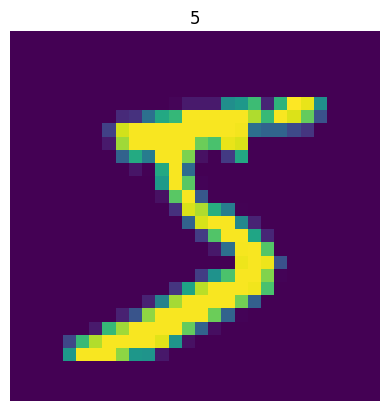

In [5]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)
plt.axis(False)



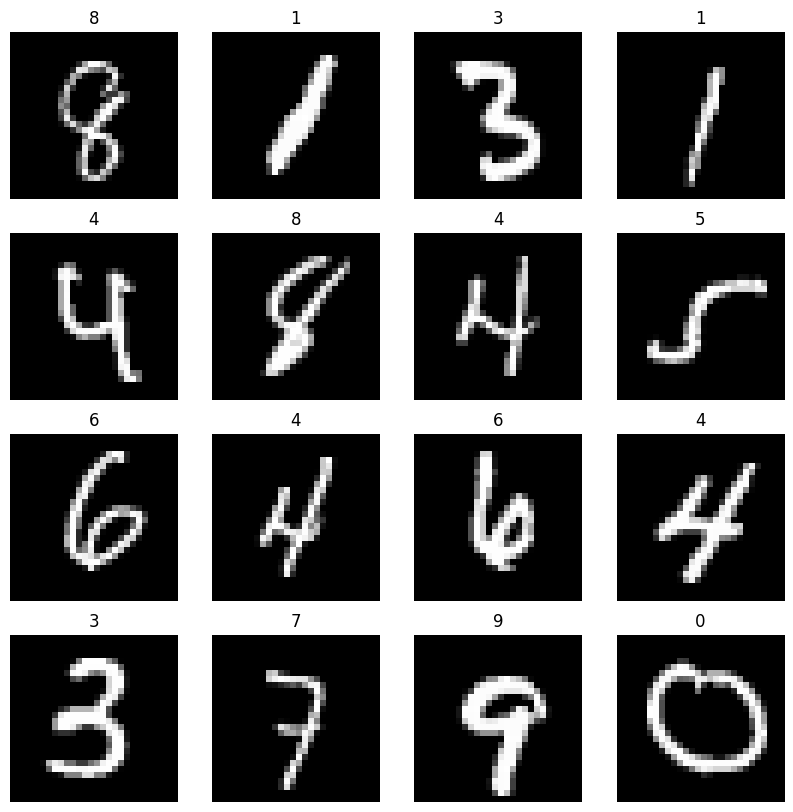

In [6]:
fig = plt.figure(figsize=(10,10))
rows, cols = 4,4
for i in range(1,rows*cols+1):
    sample_idx = torch.randint(0,len(train_data),size=[1]).item()
    img, label = train_data[sample_idx]
    fig.add_subplot(rows,cols,i)
    plt.title(label)
    plt.axis(False)
    plt.imshow(img.squeeze(), cmap="gray")



In [7]:
torch.randint(0, 10,size=[1]).item()

1

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [8]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [9]:
from torch import nn
class MNISTModelV2(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size =3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size =3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size =3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size =3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.block_1(x)

    x = self.block_2(x)

    x = self.classifier(x)

    return x

model_2 = MNISTModelV2(input_shape=1,
                       hidden_units=10,
                       output_shape=len(train_data.classes))




In [10]:
len

<function len(obj, /)>

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [11]:
import requests
from pathlib import Path
if Path("helper_funciton.py").is_file():
  print("helper_function.py already exists")
else:
  print("Downloading helper_function.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py","wb") as f:
    f.write(request.content)

In [12]:
from helper_function import accuracy_fn, print_train_time
from timeit import default_timer as timer
from tqdm.auto import tqdm

In [13]:
def train_step(model,data_loader,loss_fn,optimizer,accuracy_fn,device):
  train_loss , train_acc = 0,0
  model.to(device)
  for batch, (X,y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    y_pred = model(X)
    loss = loss_fn(y_pred,y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

def test_step(model,data_loader, loss_fn, accuracy_fn, device):
  test_loss, test_acc = 0,0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      test_pred = model(X)
      test_loss += loss_fn(test_pred,y).item()
      test_acc += accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
  test_loss /= len(data_loader)
  test_acc /= len(data_loader)
  print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

In [14]:
loss_fn = nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params=model_2.parameters(),lr=0.1)

train_time_start_on_cpu = timer()
epochs=5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model_2,train_dataloader,loss_fn=loss_fn,optimizer=optimizer,accuracy_fn=accuracy_fn,device="cpu")
  test_step(model_2,test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device="cpu")
train_time_end_on_cpu = timer()
print(f"Train time on CPU: {train_time_end_on_cpu-train_time_start_on_cpu}")

train_time_start_on_gpu = timer()
epochs=5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model_2,train_dataloader,loss_fn=loss_fn,optimizer=optimizer,accuracy_fn=accuracy_fn,device="cuda")
  test_step(model_2,test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device="cuda")
train_time_end_on_gpu = timer()
print(f"Train time on GPU: {train_time_end_on_gpu-train_time_start_on_gpu}")



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.28547 | Train acc: 90.63%
Test loss: 0.07779 | Test acc: 97.47%
Epoch: 1
---------
Train loss: 0.07881 | Train acc: 97.54%
Test loss: 0.05306 | Test acc: 98.35%
Epoch: 2
---------
Train loss: 0.06081 | Train acc: 98.19%
Test loss: 0.05957 | Test acc: 97.89%
Epoch: 3
---------
Train loss: 0.05096 | Train acc: 98.39%
Test loss: 0.04817 | Test acc: 98.41%
Epoch: 4
---------
Train loss: 0.04521 | Train acc: 98.62%
Test loss: 0.04467 | Test acc: 98.52%
Train time on CPU: 172.764158985


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.03992 | Train acc: 98.79%
Test loss: 0.04836 | Test acc: 98.55%
Epoch: 1
---------
Train loss: 0.03786 | Train acc: 98.79%
Test loss: 0.04518 | Test acc: 98.48%
Epoch: 2
---------
Train loss: 0.03480 | Train acc: 98.92%
Test loss: 0.04139 | Test acc: 98.65%
Epoch: 3
---------
Train loss: 0.03189 | Train acc: 98.98%
Test loss: 0.04031 | Test acc: 98.67%
Epoch: 4
---------
Train loss: 0.03027 | Train acc: 99.06%
Test loss: 0.04425 | Test acc: 98.58%
Train time on GPU: 65.16578472399999


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [1]:
def eval_model(model,data_loader,loss_fn,accuracy_fn,device):
  loss, acc = 0,0
  model.to(device)
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      loss += loss_fn(y_pred,y).item()
      acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
  loss /= len(data_loader)
  acc /= len(data_loader)

  return {"model_name":model.__class__.__name__,
          "model_loss":loss,
          "model_acc":acc}

model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_2_results

NameError: name 'model_2' is not defined

In [ ]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device=device):
  pred_probs= []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample,dim=0).to(device)
      pred_logit= model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)



## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?